In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
!pip install wheel

In [5]:
!pip install pip --upgrade

In [6]:
DATA_FOLDER = 'LAM data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

In [7]:
data_file = os.path.join(DATA_FOLDER, 'lamraw_168_18_276.xlsx')
df = pd.read_excel(data_file)

df

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,168,18,276,0,0,5,19,1960-03-01 00:00:00,2,Vantaa,1,90,0,519,-2,0
1,168,18,276,0,0,38,24,4.00,1,Vantaa,1,104,0,3824,-2,0
2,168,18,276,0,1,2,14,1940-03-01 00:00:00,4,Espoo,1,80,0,6214,-2,0
3,168,18,276,0,1,20,63,15.20,4,Espoo,4,80,0,8063,1833,0
4,168,18,276,0,1,25,96,1980-12-01 00:00:00,3,Espoo,3,97,0,8596,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58845,168,18,276,23,59,28,76,14.00,4,Espoo,4,85,0,8636876,763,0
58846,168,18,276,23,59,31,70,15.60,4,Espoo,4,85,0,8637170,234,0
58847,168,18,276,23,59,42,35,1940-03-01 00:00:00,4,Espoo,1,87,0,8638235,998,0
58848,168,18,276,23,59,42,79,14.80,1,Vantaa,4,67,0,8638279,2626,0


In [8]:
result = df.groupby(['hour']).size()
result

hour
0      245
1      185
2      131
3      128
4      317
5     1173
6     4000
7     5406
8     4943
9     3023
10    2591
11    2753
12    2816
13    3077
14    3758
15    5549
16    5716
17    4359
18    2646
19    2082
20    1626
21    1114
22     730
23     482
dtype: int64

<AxesSubplot:xlabel='hour'>

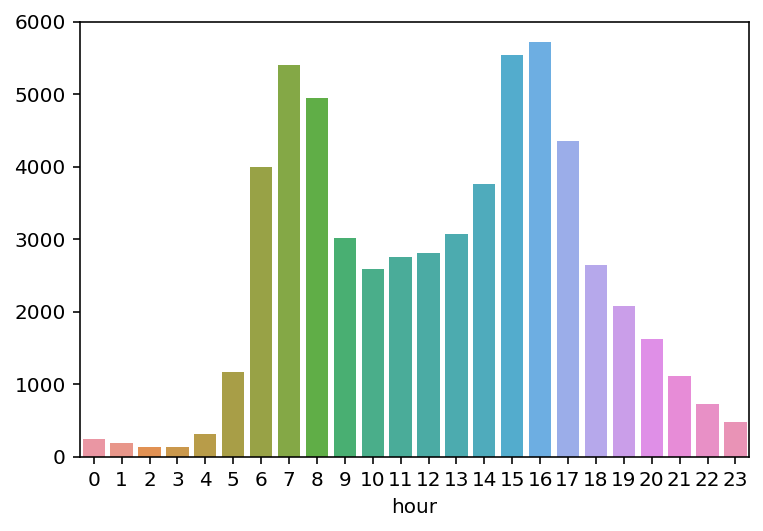

In [78]:
sns.barplot(x = result.index, y = result.values)

(array([ 245.,  185.,  131.,  128.,  317., 1173., 4000., 5406., 4943.,
        3023., 2591., 2753., 2816., 3077., 3758., 5549., 5716., 4359.,
        2646., 2082., 1626., 1114.,  730.,  482.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

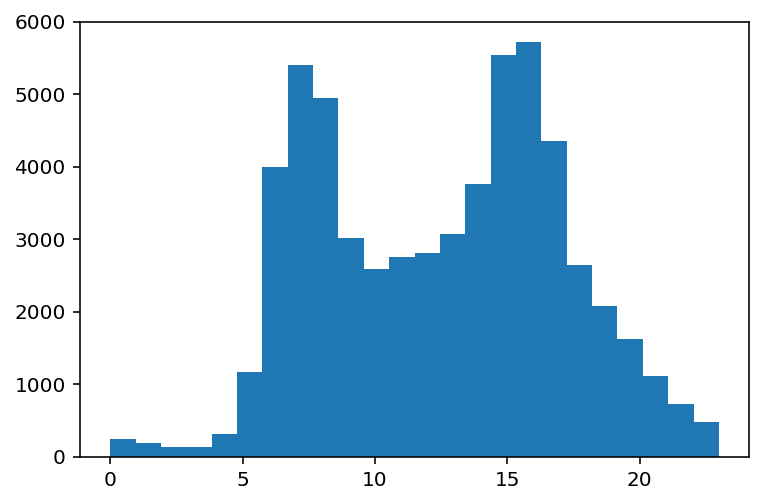

In [79]:
plt.hist(df.hour, bins = 24)

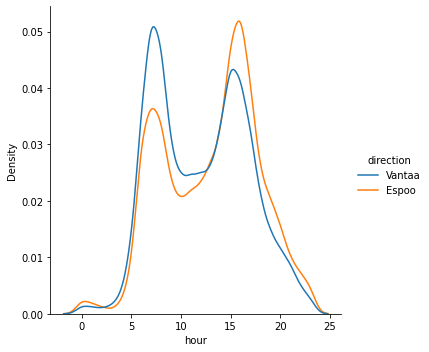

In [43]:
sns.displot(df, x='hour', kind='kde', hue='direction')

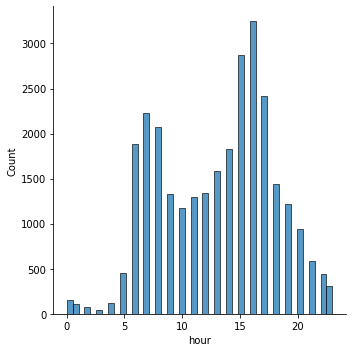

In [45]:
sns.displot(df[df.direction == 'Espoo'], x='hour', kind='hist')

<AxesSubplot:xlabel='hour'>

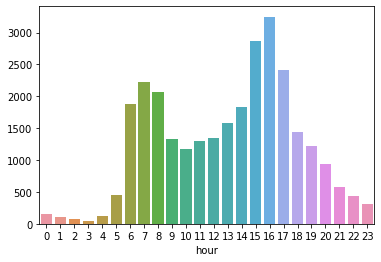

In [46]:
df_espoo = df[df.direction == 'Espoo']
result = df_espoo.groupby(['hour']).size()
sns.barplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='direction'>

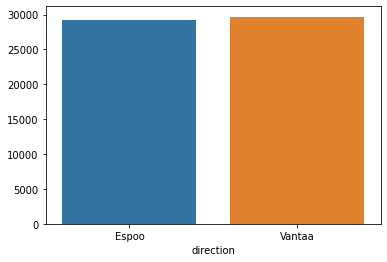

In [48]:
r = df.groupby(['direction']).size()
sns.barplot(x = r.index, y = r.values)

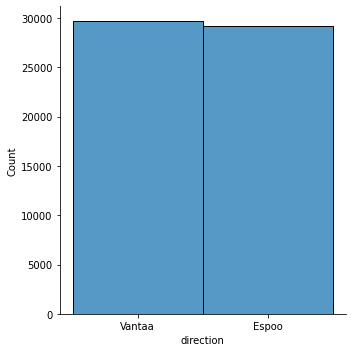

In [49]:
sns.displot(df, x='direction', kind='hist')

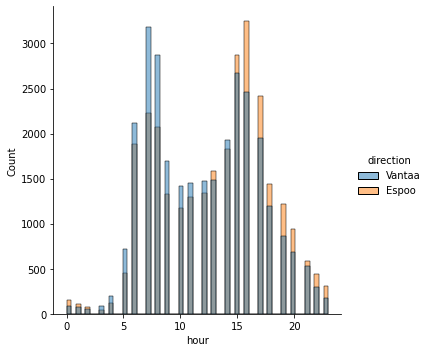

In [50]:
sns.displot(df, x='hour', kind='hist', hue='direction')

Text(0, 0.5, 'Traffic Volume')

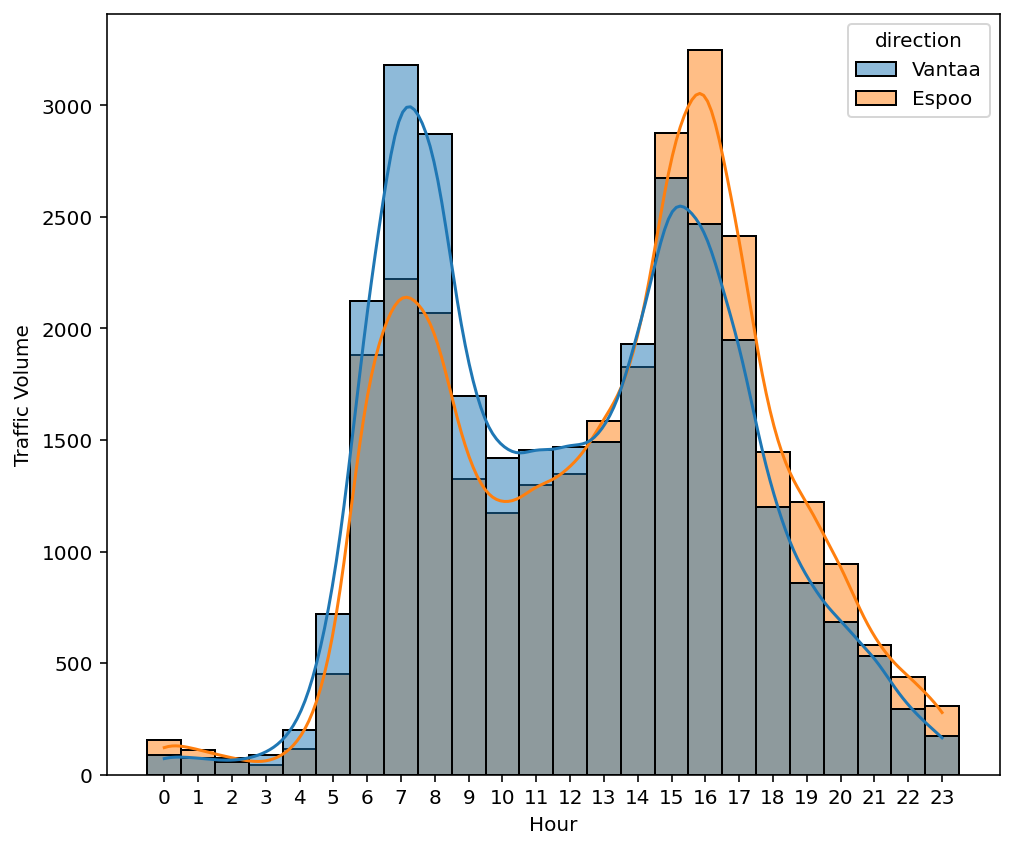

In [66]:
fig, ax = plt.subplots(figsize=(8, 7))
df['hour_str'] = df.hour.astype(str)
sns.histplot(df, x='hour_str', hue='direction', ax=ax, kde=True)
ax.set_xlabel('Hour')
ax.set_ylabel('Traffic Volume')

In [ ]:






sns.lineplot(data=df, x="hour",direction, y="Travel to and from work")
plt.tight_layout()
#plt.savefig("fig/b2.pdf")
plt.show()